In [1]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import EarlyStopping

In [2]:
random.seed(45)
np.random.seed(45)
tf.random.set_seed(45)

In [3]:
MAX_NB_WORDS = 50000  
MAX_SEQUENCE_LENGTH = 250 
EMBEDDING_DIM = 32  
epochs = 50  
batch_size = 64 

In [4]:
df=pd.read_csv(r"C:\Users\omkar\OneDrive\Documents\Internship\New\IMDB Dataset.csv\IMDB Dataset.csv")

In [5]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 124306 unique tokens.


In [6]:
X = tokenizer.texts_to_sequences(df['review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (50000, 250)


In [8]:
Y = df['sentiment']
enc = OneHotEncoder(handle_unknown='ignore')
Y = enc.fit_transform(Y.values.reshape(-1,1)).toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(35000, 250) (35000, 2)
(15000, 250) (15000, 2)


In [10]:
model = Sequential([
    Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, mask_zero=True),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='sigmoid', name="predictions")
])

In [11]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(1e-4), 
              metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision()])

In [12]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

Epoch 1/50


c:\Users\omkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


547/547 [==============================] - 179s 313ms/step - loss: 0.5529 - accuracy: 0.7030 - auc: 0.7880 - precision: 0.7086 - val_loss: 0.3312 - val_accuracy: 0.8670 - val_auc: 0.9372 - val_precision: 0.8681
Epoch 2/50
547/547 [==============================] - 194s 354ms/step - loss: 0.2793 - accuracy: 0.8978 - auc: 0.9502 - precision: 0.8980 - val_loss: 0.2652 - val_accuracy: 0.8916 - val_auc: 0.9589 - val_precision: 0.8937
Epoch 3/50
547/547 [==============================] - 229s 418ms/step - loss: 0.1867 - accuracy: 0.9381 - auc: 0.9752 - precision: 0.9395 - val_loss: 0.2677 - val_accuracy: 0.8935 - val_auc: 0.9601 - val_precision: 0.8950
Epoch 4/50
547/547 [==============================] - 190s 348ms/step - loss: 0.1309 - accuracy: 0.9623 - auc: 0.9854 - precision: 0.9630 - val_loss: 0.2942 - val_accuracy: 0.8919 - val_auc: 0.9584 - val_precision: 0.8922
Epoch 5/50
547/547 [==============================] - 265s 484ms/step - loss: 0.0916 - accuracy: 0.9765 - auc: 0.9910 - pre

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           1600000   
                                                                 
 bidirectional (Bidirection  (None, 250, 128)          49664     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 predictions (Dense)         (None, 2)                 1

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [15]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred_labels = np.argmax(y_pred, axis=1)
print(y_pred_labels)


469/469 [==============================] - 49s 95ms/step
[[0.9443242  0.05849729]
 [0.5284822  0.46259153]
 [0.9646445  0.03826608]
 ...
 [0.94683367 0.05515986]
 [0.02217151 0.9802437 ]
 [0.03522801 0.96682817]]
[0 0 0 ... 0 1 1]


In [ ]:
print(Y_test)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [16]:
Y_test_labels = np.argmax(Y_test, axis=1)

In [ ]:
print(Y_test[0])

[0. 1.]


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7411
           1       0.90      0.88      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



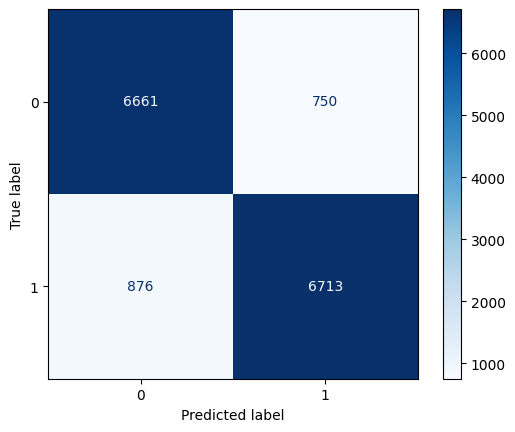

In [17]:
print(classification_report(Y_test_labels,y_pred_labels))
cm = confusion_matrix(Y_test_labels,y_pred_labels, labels=[0, 1 ])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()